In [1]:
import numpy as np
from actfunc import relu
from layer import dense, mean_square_error
from optimizer import GDoptimizer
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [2]:
class linear_regression():
    def __init__(self):
        self.layers = []
        self.layers.append(dense(1, 20, name="dense1", activation=relu))
        self.layers.append(dense(20, 1, name="dense2"))
        self.errorfunc = mean_square_error()
        
    def predict(self, X):
        for layer in self.layers:
            X = layer.forward(X)
        return X
    
    def loss(self, X, y):
        return self.errorfunc.forward(self.predict(X), y)
    
    def backward(self):
        dout = self.errorfunc.backward()
        for layer in self.layers[::-1]:
            dout = layer.backward(dout)

In [3]:
X = np.linspace(-10, 10, 200).reshape(-1, 1)
y = 3 * X + 5 + np.random.randn(*X.shape) * 3

In [4]:
model = linear_regression()
learning_rate = 0.01
optimizer = GDoptimizer(learning_rate)

In [5]:
loss_list = []
for i in range(1000):
    loss_list.append(model.loss(X, y))
    model.backward()
    optimizer.minimize(model.layers)

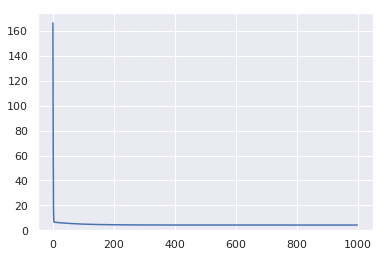

In [6]:
plt.plot(loss_list)
plt.ylim((0, None));

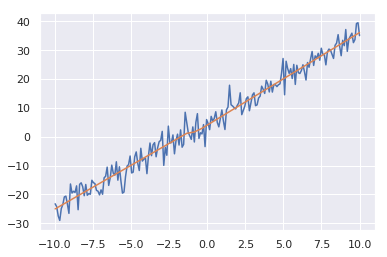

In [7]:
plt.plot(X, y)
plt.plot(X, model.predict(X));